In [24]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [5]:
df = pd.read_csv('../data/housing.csv')

In [2]:
def mse(idx, target):
    error = target[idx].mean() - target[idx]
    return np.mean(error**2)

In [26]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [28]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [29]:
query = df['RM'] > 6.998

In [31]:
df[query]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
40,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
88,0.05660,0.0,3.41,0,0.4890,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
89,0.05302,0.0,3.41,0,0.4890,7.079,63.1,3.4145,2,270,17.8,396.06,5.70,28.7
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0,0.4450,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
99,0.06860,0.0,2.89,0,0.4450,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2


In [32]:
df[~query]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9


In [35]:
tree = DecisionTreeRegressor()

In [36]:
tree.get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
X = df.iloc[:, :-1]
y = df['PRICE']

In [39]:
leaf_size = [1, 5, 10, 15, 25]
cross_val_scores = []

for size in leaf_size:
    tree.set_params(min_samples_leaf=size)
    scores = cross_val_score(estimator=tree, X=X, y=y, cv=10)
    cross_val_scores.append((np.mean(scores), size))

In [40]:
cross_val_scores

[(-0.21715863697947224, 1),
 (0.11733331879617545, 5),
 (0.2989199326623594, 10),
 (0.21663812735676996, 15),
 (0.2037805387980621, 25)]

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rf = RandomForestRegressor()

In [43]:
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [44]:
rf.set_params(max_features=10)

In [ ]:
rf.set_params(max_features=0.5)

In [48]:
rf.set_params(n_estimators=40, oob_score=True)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.2, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [54]:
max_feats = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
cv_scores = []

for val in max_feats:
    rf.set_params(max_features=val)
    scores = cross_val_score(estimator=rf, X=X, y=y, cv=10)
    cv_scores.append((np.mean(scores), val))

In [51]:
cv_scores

[(0.47828181360337474, 0.2),
 (0.5385614512363534, 0.3),
 (0.5601979231988148, 0.4),
 (0.5721183760570084, 0.5),
 (0.5609636402242963, 0.6),
 (0.5445784945165261, 0.7)]

In [55]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [56]:
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
lreg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [58]:
from sklearn.linear_model import Ridge, Lasso

In [59]:
rreg = Ridge()

In [63]:
lasso_reg = Lasso()

In [61]:
rreg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [64]:
lasso_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [65]:
np.logspace(-6, 6, 200)

array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05,
       1.60705282e-05, 1.84642494e-05, 2.12145178e-05, 2.43744415e-05,
       2.80050389e-05, 3.21764175e-05, 3.69691271e-05, 4.24757155e-05,
       4.88025158e-05, 5.60716994e-05, 6.44236351e-05, 7.40196000e-05,
       8.50448934e-05, 9.77124154e-05, 1.12266777e-04, 1.28989026e-04,
       1.48202071e-04, 1.70276917e-04, 1.95639834e-04, 2.24780583e-04,
       2.58261876e-04, 2.96730241e-04, 3.40928507e-04, 3.91710149e-04,
       4.50055768e-04, 5.17092024e-04, 5.94113398e-04, 6.82607183e-04,
       7.84282206e-04, 9.01101825e-04, 1.03532184e-03, 1.18953407e-03,
       1.36671636e-03, 1.57029012e-03, 1.80418641e-03, 2.07292178e-03,
      

In [77]:
X = (X - X.mean()) / X.std()

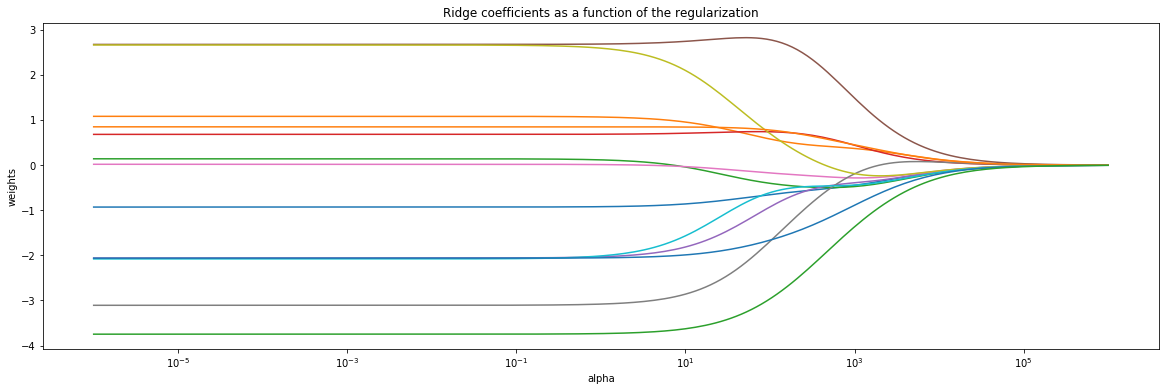

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
# now let's see how coefficients change over time
coefs = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    rreg.set_params(alpha=a)
    rreg.fit(X, y)
    coefs.append(rreg.coef_)

# Display results
plt.figure(figsize=(20, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [71]:
rreg.coef_

array([-0.001798  ,  0.00166864, -0.00223928,  0.0008134 , -0.00197766,
        0.00322433, -0.00174432,  0.00115441, -0.0017657 , -0.00216887,
       -0.00235333,  0.00154435, -0.00341874])

In [78]:
alphas      = np.logspace(-4, 4, 9)
rreg_scores = []

for alpha in alphas:
    rreg.set_params(alpha=alpha)
    scores = cross_val_score(estimator=rreg, X=X, y=y, cv=10)
    rreg_scores.append((np.mean(scores), alpha))

In [79]:
max(rreg_scores)

(0.3566689765145655, 100.0)

In [80]:
rreg

Ridge(alpha=10000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [81]:
rreg.coef_

array([-0.001798  ,  0.00166864, -0.00223928,  0.0008134 , -0.00197766,
        0.00322433, -0.00174432,  0.00115441, -0.0017657 , -0.00216887,
       -0.00235333,  0.00154435, -0.00341874])

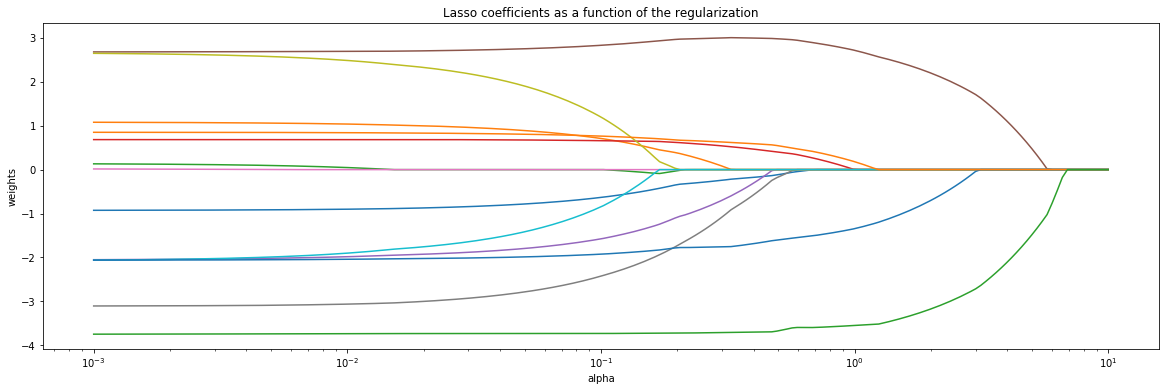

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
# now let's see how coefficients change over time
coefs = []

alphas = np.logspace(-3, 1, 200)

# Train the model with different regularisation strengths
for a in alphas:
    lasso_reg.set_params(alpha=a)
    lasso_reg.fit(X, y)
    coefs.append(lasso_reg.coef_)

# Display results
plt.figure(figsize=(20, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [85]:
lasso_reg.coef_

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

In [86]:
alphas      = np.logspace(-4, 4, 9)
lareg_scores = []

for alpha in alphas:
    lasso_reg.set_params(alpha=alpha)
    scores = cross_val_score(estimator=lasso_reg, X=X, y=y, cv=10)
    lareg_scores.append((np.mean(scores), alpha))

In [88]:
max(lareg_scores)

(0.24078907824679283, 0.1)

In [90]:
lasso_reg.set_params(alpha=0.1)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
lasso_reg.coef_

array([-0.63262818,  0.70874959, -0.        ,  0.65822677, -1.57531461,
        2.82922556, -0.        , -2.4237591 ,  1.19570262, -0.84616381,
       -1.92427163,  0.76283528, -3.7298695 ])